# Bank notes authentication using K-Means Clustering 

## Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.

## Source  
* Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)
* Dataset = https://www.openml.org/d/1462


## Attribute Information

1. Variance of Wavelet Transformed image (continuous) 
2. Skewness of Wavelet Transformed image (continuous) 
3. Curtosis of Wavelet Transformed image (continuous) 
4. Entropy of image (continuous) 
5. Class (integer) (Presumably 1 for genuine and 2 for forged)

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
import seaborn as sb
import warnings

In [2]:
data = pd.read_csv("csv_result-php50jXam.csv") # Read the data from the CSV file
data.head(10) # Display the first few rows of the data

,id,V1,V2,V3,V4,Class
0,1,3.62160,8.6661,-2.80730,-0.44699,1
1,2,4.54590,8.1674,-2.45860,-1.46210,1
2,3,3.86600,-2.6383,1.92420,0.10645,1
3,4,3.45660,9.5228,-4.01120,-3.59440,1
4,5,0.32924,-4.4552,4.57180,-0.98880,1
5,6,4.36840,9.6718,-3.96060,-3.16250,1
6,7,3.59120,3.0129,0.72888,0.56421,1
7,8,2.09220,-6.8100,8.46360,-0.60216,1
8,9,3.20320,5.7588,-0.75345,-0.61251,1
9,10,1.53560,9.1772,-2.27180,-0.73535,1


In [3]:
data.drop(columns = ['id'], inplace=True) # Dropping the 'id' column
data.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [4]:
data.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [5]:
data.isnull().sum() # Check for missing values

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


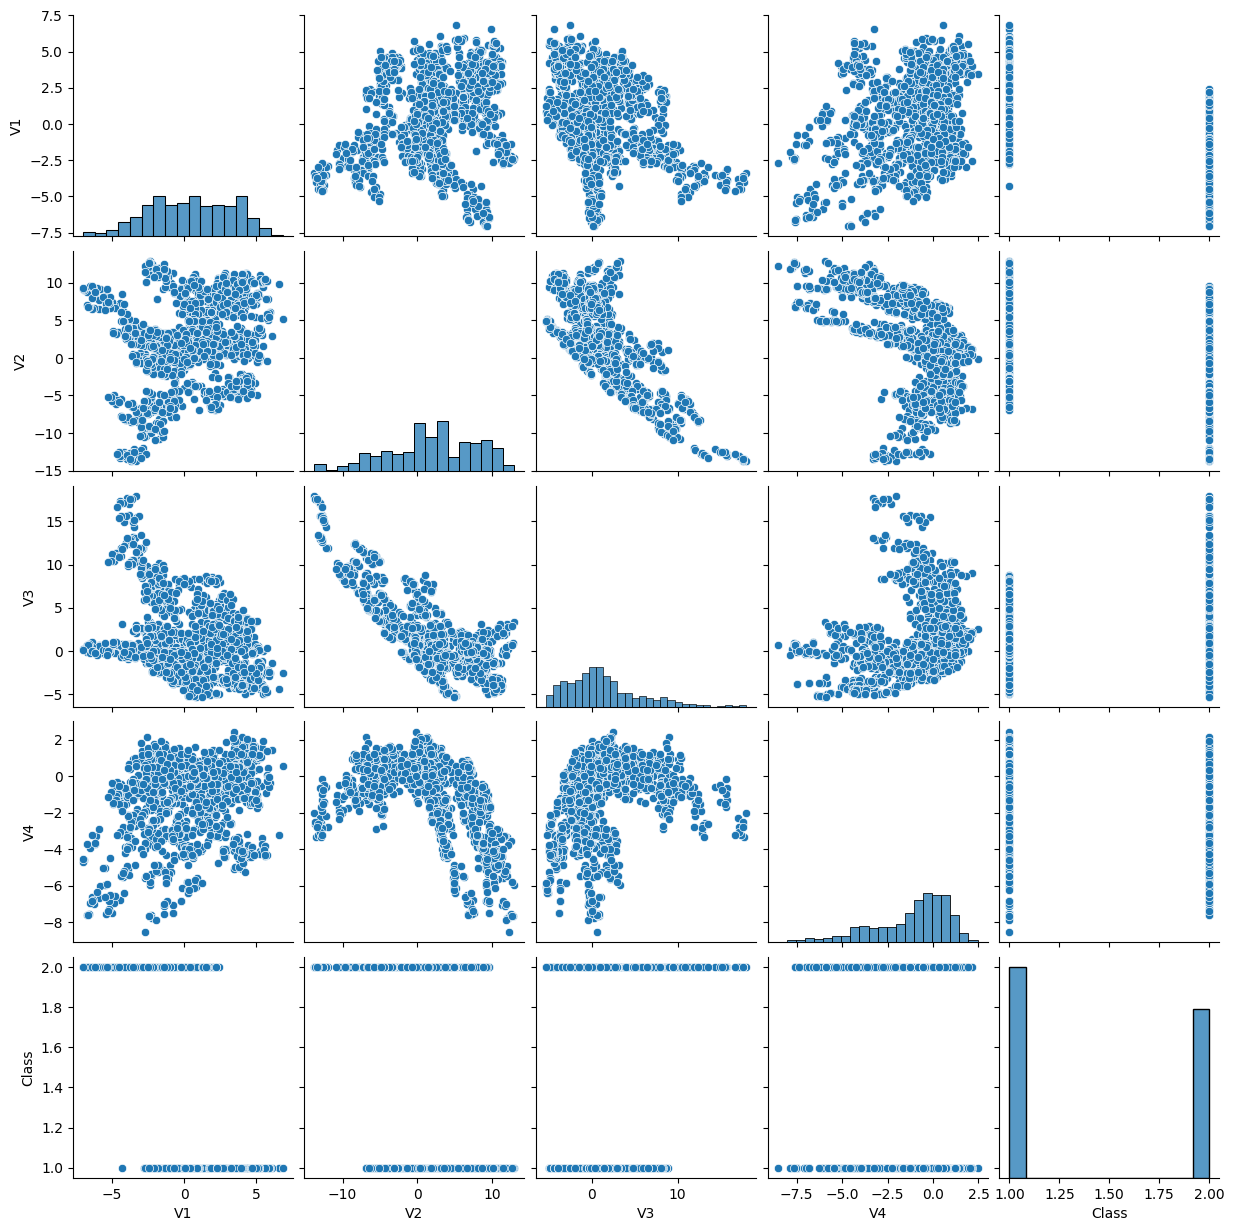

In [7]:
# Plot a graph to check the linear correlation of the data features
sns.pairplot(data)

In [8]:
# Extract the required columns from the DataFrame
v1 = data['V1']
v2 = data['V2']

In [9]:
df = pd.DataFrame({'v1': v1, 'v2': v2})
df.head()

,v1,v2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [10]:
df.describe()

,v1,v2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


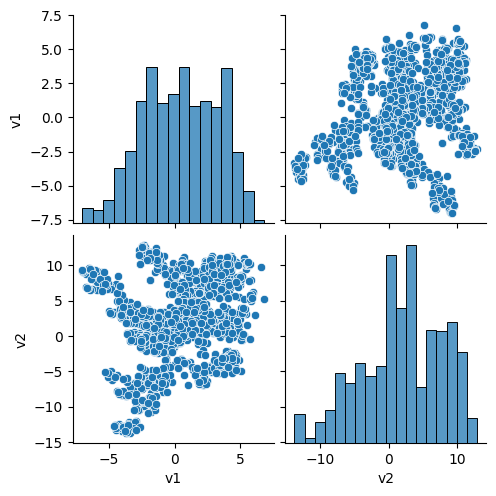

In [11]:
# Plot a graph to check the linear correlation of the data features
sns.pairplot(df)

# Evaluating if the given dataset is suitable for k-means clustering

* Data Structure: K-means clustering assumes that the data points in the dataset can be represented as vectors in a multidimensional space. Therefore, the dataset should have a tabular structure with numerical or continuous features. 
* Feature Scaling: K-means clustering is sensitive to the scale of the features. It is recommended to scale the features to a similar range before applying k-means clustering. 
* Outliers: K-means clustering is sensitive to outliers as they can heavily influence the cluster centers.

## Applying Feature Scaling (Standardisation)

In [12]:
df = (df - df.min()) / (df.max() - df.min())

In [13]:
df.head()

,v1,v2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [14]:
df.describe()

,v1,v2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


## Analyzing outliers

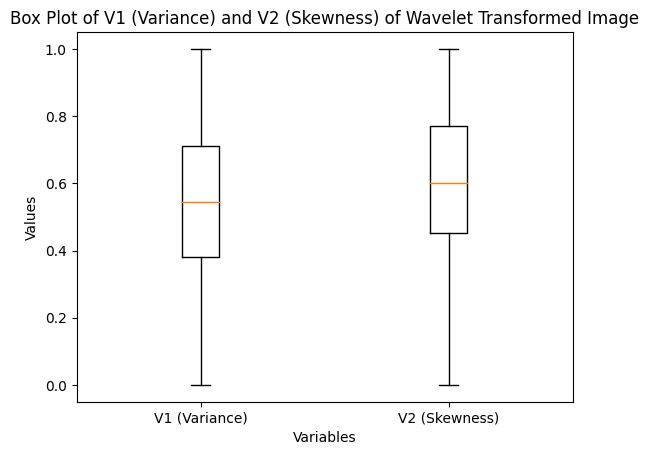

In [15]:
# Using Boxplots to analyze outliers after applying Feature Scaling
plt.boxplot([df['v1'], df['v2']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of V1 (Variance) and V2 (Skewness) of Wavelet Transformed Image')
plt.xticks([1, 2], ['V1 (Variance)', 'V2 (Skewness)'])
plt.show()

* The line inside the box represents the median.
* The box represents the interquartile range (IQR), which spans from the 25th percentile (Q1) to the 75th percentile (Q3).
* The whiskers extend from the box and represent the range of non-outlier data points. By default, the whiskers extend 1.5 times * the IQR beyond the upper and lower quartiles.
* Any data points outside the whiskers are considered potential outliers.

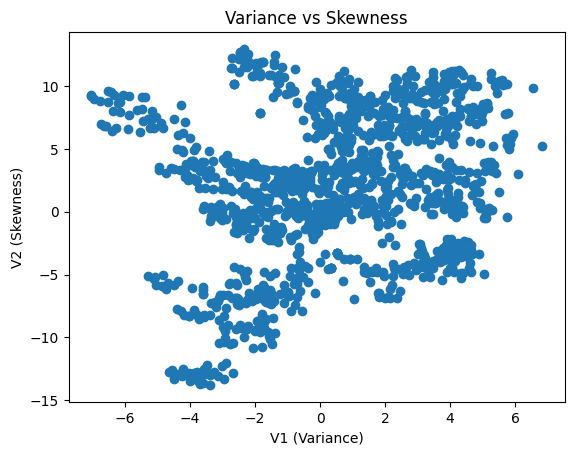

In [16]:
# Using scatterplots to analyze outliers
# V1 is variance of Wavelet Transformed image
# V2 is skewness of Wavelet Transformed image
plt.scatter(v1, v2)
plt.xlabel("V1 (Variance)")
plt.ylabel("V2 (Skewness)")
plt.title("Variance vs Skewness")
plt.show()

* The data distribution in the graph exhibits a moderate spread and is not heavily concentrated in one location. Hence, attempting K-Means on this dataset is worthwhile.
* Since there are no evident clusters in spherical shapes, it is reasonable to anticipate that the K-Means model might not perform optimally in this scenario.

In [17]:
# Calculate the variances of V1 and V2
variance_v1 = df['v1'].var()
variance_v2 = df['v2'].var()

print("Variance of V1:", variance_v1)
print("Variance of V2:", variance_v2)

Variance of V1: 0.042026421768907724
Variance of V2: 0.0482291335152624


## The variance of V1 and V2 Before and After applying Feature Scaling:  

* The variance of V1 before feature scaling was 8.0813, indicating a moderate spread of data points around the mean of V1. A higher variance suggests a wider range of values, indicating more variability in the data.

* Before feature scaling, V2 exhibited a higher variance of 34.4457. This indicates a larger spread or dispersion of data points around the mean of V2 than in V1.

* The variance of V1 after applying feature scaling is 0.042026421768907724 and that of V2 is 0.0482291335152624

* These variances signify the spread or dispersion of data points for each respective variable. The relatively small variances for both V1 and V2 suggest that the data points are tightly clustered around their respective means. This characteristic makes the dataset suitable for K-Means clustering, as the algorithm assumes tight clusters of data points within each cluster.


In [18]:
data = np.column_stack((df['v1'], df['v2']))
# Choose the number of clusters (K=2)
K = 2
# Perform K-Means clustering
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [19]:
# Get cluster centers (centroids) and cluster labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

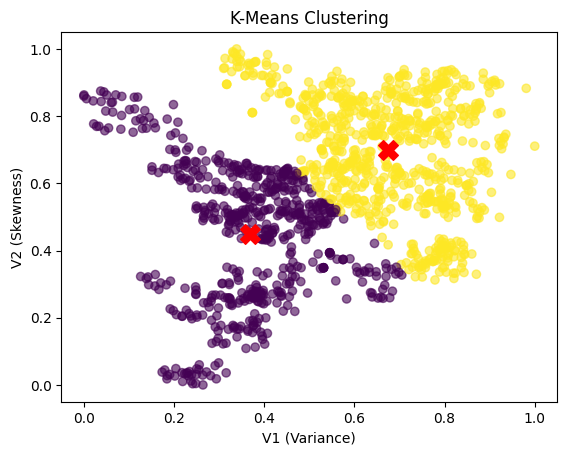

In [20]:
# Plot the data points and cluster centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centroids')
plt.xlabel('V1 (Variance)')
plt.ylabel('V2 (Skewness)')
plt.title('K-Means Clustering')
plt.savefig('figure.png')
plt.show()

## In order to ensure the stability of the K-Means model on this dataset, we execute it multiple times and observe if we obtain consistent outcomes.

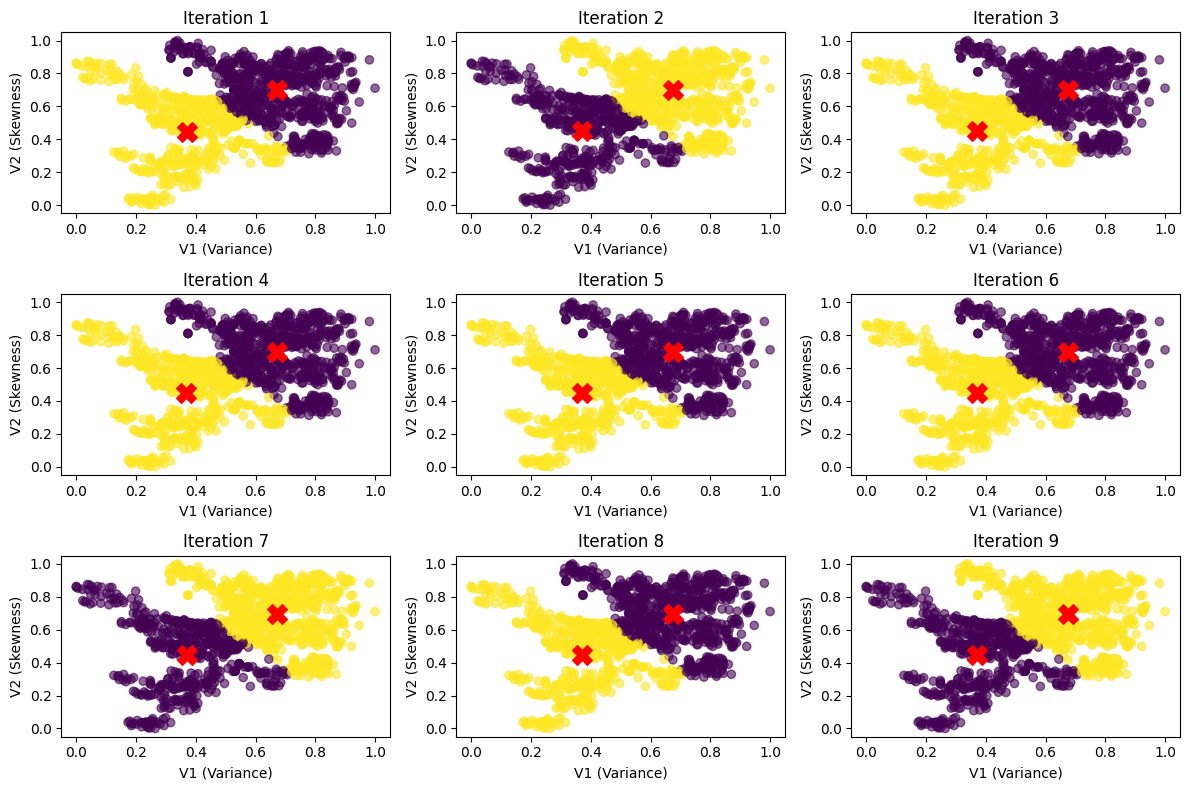

In [21]:
# Plotting settings
plt.figure(figsize=(12, 8))
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'K-Means Clustering with Cluster Centroids (K={K})')
warnings.simplefilter("ignore")
# Number of times to repeat K-Means clustering
num_iterations = 9

# Repeat K-Means clustering and plot the results
for i in range(num_iterations):
    # Perform K-Means clustering with a different random initialization each time
    kmeans = KMeans(n_clusters=K, random_state=i, n_init=10)
    kmeans.fit(data)
    
    # Get cluster centers (centroids) and cluster labels
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    # Plot the data points and cluster centroids for each iteration
    plt.subplot(3, 3, i+1)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.xlabel('V1 (Variance)')
    plt.ylabel('V2 (Skewness)')
    plt.title(f'Iteration {i+1}')

plt.tight_layout()
plt.show()

* K-Means exhibits sensitivity to initializations, resulting in variability in the clustering outcomes across different runs. By conducting multiple runs, we can achieve a more dependable comprehension of the underlying data structure.
* After performing K-Means nine times, we observe remarkable similarity in the obtained results, indicating that the K-Means clustering is stable in this particular case.

## Recommendation:

Based on a thorough analysis, it is evident that the K-means clustering algorithm has demonstrated its effectiveness in distinguishing between forged and genuine banknotes.

 However, to further enhance the accuracy of the process and improve differentiation between genuine and forged banknotes, it is advisable for the bank to gather additional information on the banknotes. This additional data will provide valuable insights and contribute to a higher success rate in the classification process.